<a href="https://colab.research.google.com/github/mukhammadarifin/PCVK_Genap_2021/blob/main/Minggu_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TUGAS PRAKTIKUM MINGGU 11

1. Buka https://colab.research.google.com/. Setelah dipastikan bahwa google Colab 
terhubung dengan Github Anda, buat notebook baru dan beri nama “Week11.ipynb”. 
Kemudian import beberapa library dan akses folder yang ada di Drive Anda dengan 
cara sebagai berikut. 


In [2]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


2. Implementasikan 6 metode template matching pada OpenCV dengan menggunakan 
gambar cats_and_bunnies.jpg dan cat2_templatejpg.jpg sebagai templatenya. 


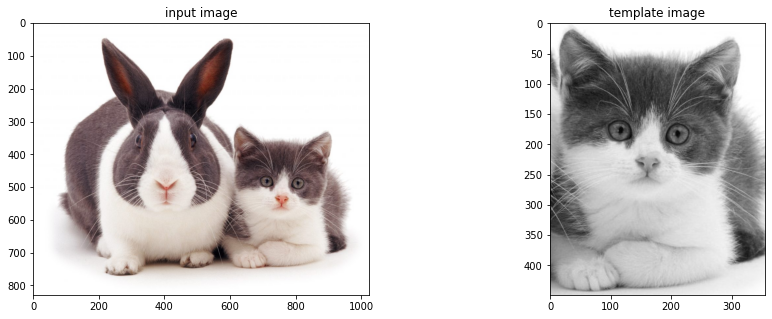

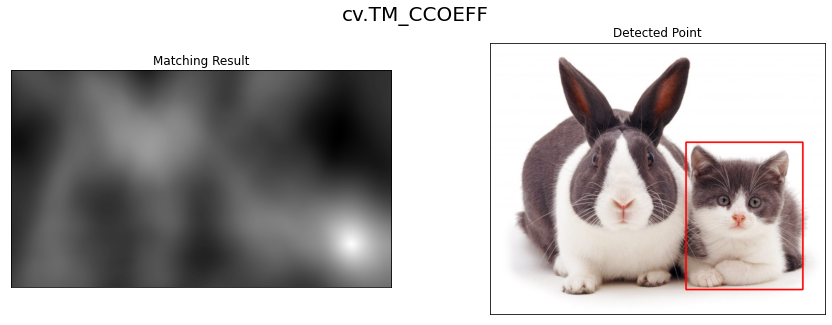

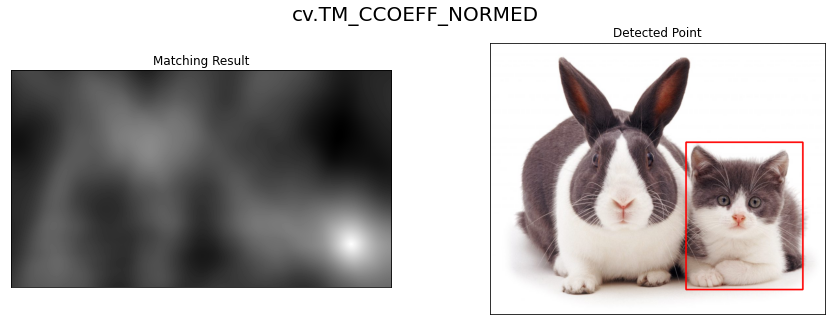

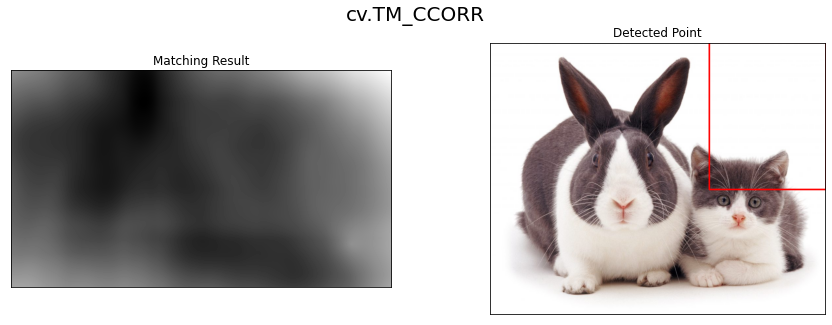

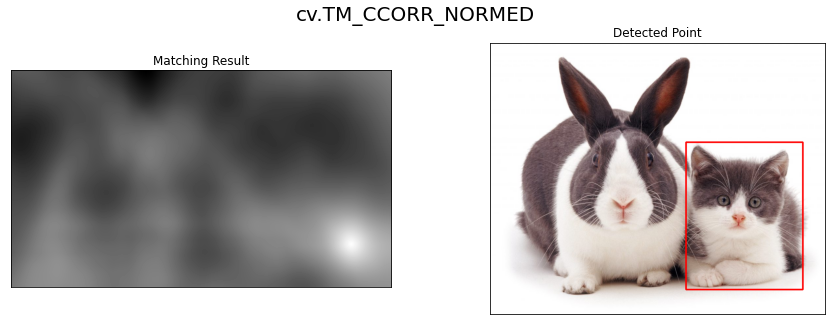

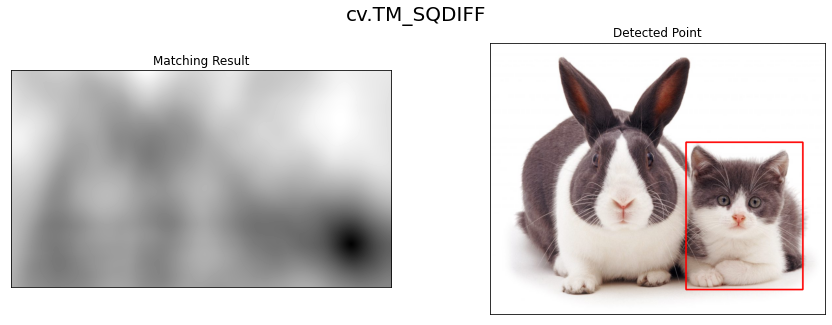

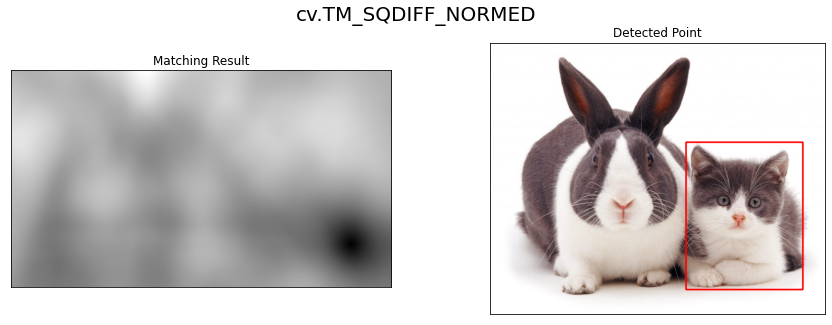

In [13]:
img = cv.imread('/content/drive/MyDrive/image/cats_and_bunnies.jpg')
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
img2 = img.copy()
template = cv.imread('/content/drive/MyDrive/image/cat2_templatejpg.jpg',0)
w, h = template.shape[::-1]

f, axarr = plt. subplots(1,2,figsize=(15,5)) #membuat 2 plot untuk citra input dan template 
axarr[0].imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB)), axarr[0].set_title("input image") 
axarr[1].imshow(cv.cvtColor(template, cv.COLOR_BGR2RGB)), axarr[1].set_title("template image")

# All the 6 methods for comparison in a list
methods = ['cv.TM_CCOEFF', 'cv.TM_CCOEFF_NORMED', 'cv.TM_CCORR',
            'cv.TM_CCORR_NORMED', 'cv.TM_SQDIFF', 'cv.TM_SQDIFF_NORMED']

for meth in methods:
    img = img2.copy()
    method = eval(meth)
    # Apply template Matching
    res = cv.matchTemplate(img_gray,template,method)
    min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)
    # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    if method in [cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)

    cv.rectangle(img,top_left, bottom_right,(0,0,255), 3)
    plt.figure(figsize=(15,5))
    plt.subplot(121),plt.imshow(res,cmap = 'gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    print("\n\n")
    plt.suptitle(meth, fontsize=20)
    plt.show()

3. Implementasikan metode Sobel Edge Detection, Canny Edge Detection, dan Laplacian 
Edge Detection pada OpenCV dengan menggunakan gambar parking-lot-cars.jpg, 
sehingga menghasilkan luaran sebagai berikut: 


4. Implementasikan metode Harris Corner Detection dan Shi-Tomasi Detection pada 
OpenCV dengan menggunakan gambar chess-board.jpg, sehingga menghasilkan 
luaran sebagai berikut: 
  
  a. Harris Corner Detection

  b. Shi-Tomasi Detection 


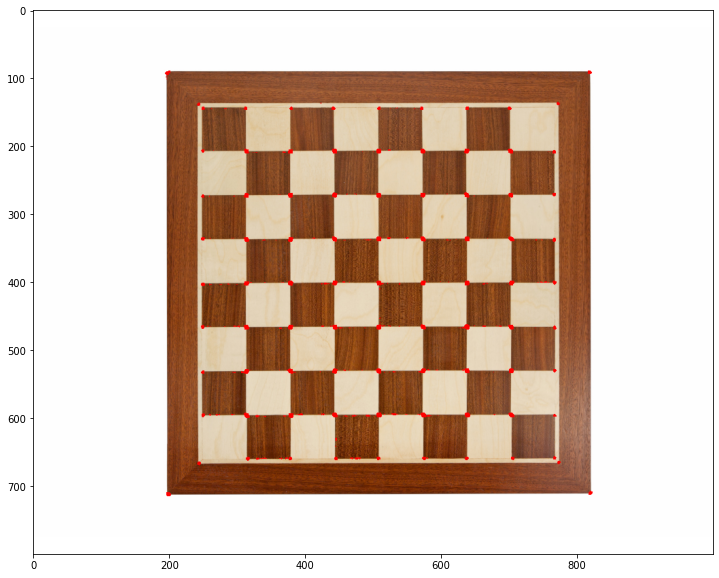

In [20]:
#Harris Corner
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

#load citra input 
input_img = cv.imread('/content/drive/MyDrive/image/chess-board.jpg') 
gray_img = cv.cvtColor(input_img, cv.COLOR_BGR2GRAY)
dst = cv.cornerHarris(gray_img,4,5,0.001)

gray_img = np.float32(gray_img) 
harris_output = cv.cornerHarris(gray_img,2,3, 3)
#hasil harris corner dilakukan dilasi untuk menandai sudut 
harris_output = cv.dilate(harris_output, None)

#Threshold untuk mengoptimalkan nilai 
input_img[dst>0.01*dst.max()]=[0,0,255]

plt.figure(figsize=(20,10)) 
plt.imshow(cv.cvtColor(input_img, cv.COLOR_BGR2RGB))

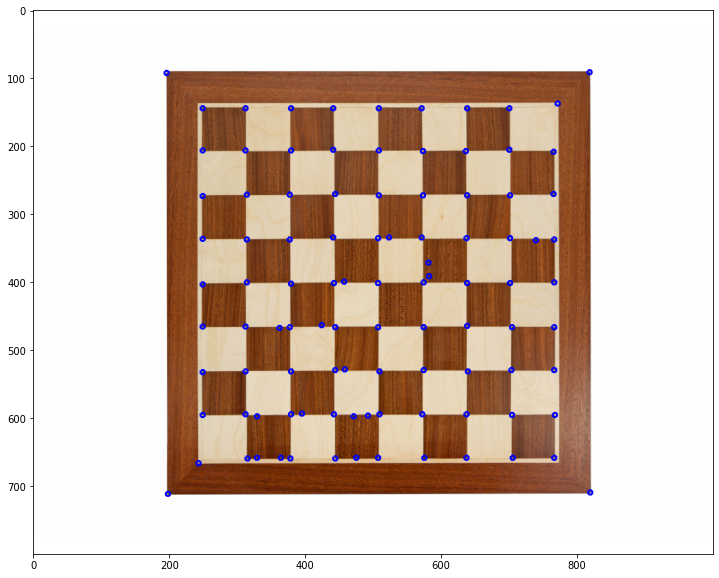

In [8]:
input_img = cv.imread('/content/drive/MyDrive/image/chess-board.jpg') 
gray_img = cv.cvtColor(input_img, cv.COLOR_BGR2GRAY)

corners = cv.goodFeaturesToTrack(gray_img, 100,0.01,10) 
corners = np. int0(corners) 
for i in corners:
    x,y = i.ravel() 
    cv.circle(input_img, (x,y),3,255,2)

plt.figure(figsize=(20,10)) 
plt.imshow(cv.cvtColor(input_img, cv.COLOR_BGR2RGB))

5. Implementasikan metode Hough Transform pada OpenCV dengan menggunakan 
gambar sudoku.jpg. Tahapan proses grid detection sesuai yang terdapat pada ulasan 
teori, sehingga menghasilkan luaran sebagai berikut: 

number of Hough lines: 33
Number of filtered lines: 1
Number of filtered lines: 2
Number of filtered lines: 3
Number of filtered lines: 4
Number of filtered lines: 5
Number of filtered lines: 6
Number of filtered lines: 7
Number of filtered lines: 8
Number of filtered lines: 9
Number of filtered lines: 10
Number of filtered lines: 11
Number of filtered lines: 12
Number of filtered lines: 13
Number of filtered lines: 14
Number of filtered lines: 14
Number of filtered lines: 15
Number of filtered lines: 15
Number of filtered lines: 15
Number of filtered lines: 16
Number of filtered lines: 16
Number of filtered lines: 17
Number of filtered lines: 17
Number of filtered lines: 18
Number of filtered lines: 18
Number of filtered lines: 19
Number of filtered lines: 19
Number of filtered lines: 19
Number of filtered lines: 20
Number of filtered lines: 20
Number of filtered lines: 20
Number of filtered lines: 20
Number of filtered lines: 20
Number of filtered lines: 20


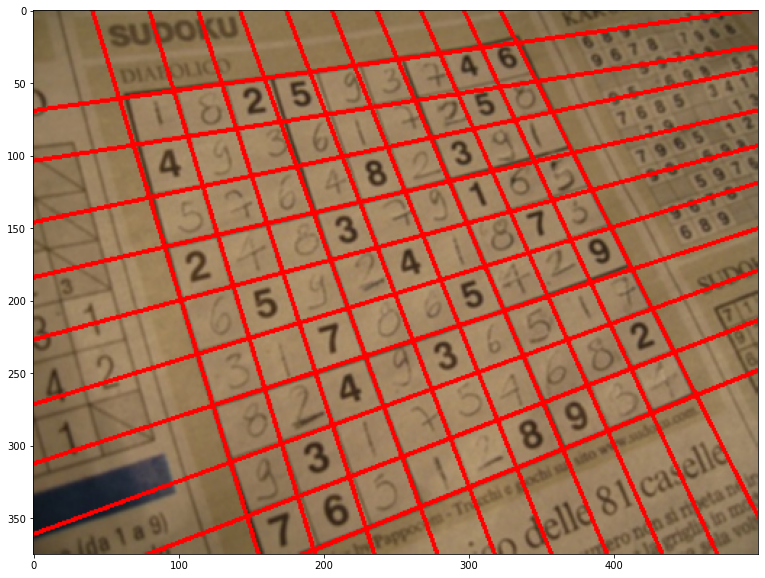

In [11]:
#Hough Transform SUDOKU
input_img = cv.imread('/content/drive/MyDrive/image/sudoku.jpg') 
img_gray = cv.cvtColor(input_img, cv.COLOR_BGR2GRAY)

edges = cv.Canny (img_gray, 90, 150, apertureSize = 3)

kernel = np.ones((3,3), np.uint8) 
edges = cv.dilate(edges,kernel,iterations = 1)

kernel = np.ones((5,5), np.uint8) 
edges = cv.erode (edges, kernel, iterations = 1)

lines = cv.HoughLines(edges,1,np.pi/180,150)


if not lines.any():
    print('No lines were found') 
    exit()

if filter:
    rho_threshold = 15 
    theta_threshold = 0.1

    # berapa banyak baris yang mirip dengan yang diberikan 
    similar_lines = {i : [] for i in range(len(lines))} 
    for i in range(len(lines)): 
      for j in range (len (lines)): 
        if i == j: 
            continue

        rho_i, theta_i = lines[i][0] 
        rho_j, theta_j = lines[j][0] 
        if abs(rho_i - rho_j) < rho_threshold and abs (theta_i - theta_j) < theta_threshold:
            similar_lines[i].append(j)

    # mengurutkan indeks garis dengan melihat seberapa banyak yang mirip dengannya 
    indices = [i for i in range(len(lines))] 
    indices.sort(key=lambda x: len(similar_lines[x]))

    # line flags sebagai dasar filtering 
    line_flags = len(lines) *[True] 
    for i in range(len(lines) - 1): 
        if not line_flags [indices[i]]: #jika elemen ke-i tidak dimasukkan, maka akan diabaikan
            continue

        for j in range(i + 1, len(lines)): # hanya mempertimbangkan elemen-elemen yang memilik 
            if not line_flags[indices[j]]:
                continue
            rho_i, theta_i = lines[indices[i]][0] 
            rho_j, theta_j = lines[indices[j]][0] 
            if abs(rho_i - rho_j) < rho_threshold and abs(theta_i - theta_j) < theta_threshold:
                line_flags [indices[j]] = False
    print('number of Hough lines:', len(lines))
    
    filtered_lines = []

    if filter:
        for i in range(len(lines)): # filtering
            if line_flags[i]:
                filtered_lines.append(lines[i])

            print('Number of filtered lines:', len(filtered_lines )) 
    else:
        filtered_lines = lines

    for line in filtered_lines:
        rho, theta = line [0] 
        a = np.cos(theta) 
        b = np.sin(theta) 
        x0 = a*rho 
        y0 = b*rho 
        x1 = int(x0 + 1000*(-b)) 
        y1 = int(y0 + 1000*(a)) 
        x2 = int(x0 - 1000*(-b)) 
        y2 = int(y0 - 1000*(a))

        cv.line(input_img, (x1, y1), (x2,y2),(0,0,255),2)

    plt.figure(figsize=(20,10)) 
    plt.imshow(cv.cvtColor(input_img, cv.COLOR_BGR2RGB))

6. Implementasikan fungsi findContours() pada OpenCV untuk contour detection dengan 
menggunakan gambar laptop.jpg, sehingga menghasilkan luaran sebagai berikut:


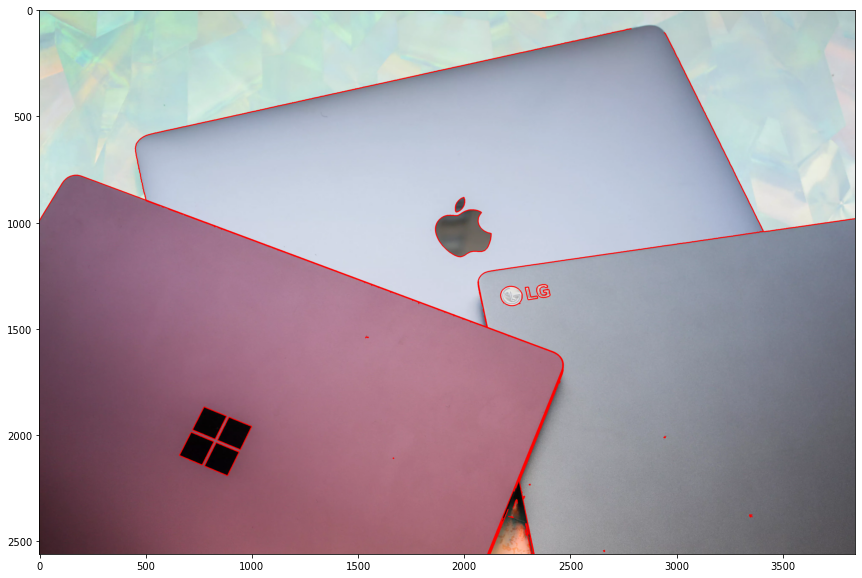

In [21]:
#findCountours
img = cv.imread('/content/drive/MyDrive/image/laptop.jpg') 
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

edged = cv.Canny(img_gray, 30, 200)

#ret, thresh = cv.threshold(img_gray, 127, 255, 0) 
contours, hierarchy = cv.findContours(edged, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_NONE)

cv.drawContours(img, contours, -1, (0,0,255), 3)

plt.figure(figsize=(20,10)) 
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))